<a href="https://colab.research.google.com/github/AmandaGit01/Repositorio_minicurso/blob/main/Borboleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passo 1 - Preparando o ambiente

In [ ]:
!pip install --upgrade tensorflow # usando a biblioteca tensor flow


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers                          # Esse trecho realiza uma importação de bibliotecas e módulos
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())                                                                    # Esse código define uma função que cria e retorna um gerador para uma rede adversaria

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model



In [ ]:
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
                                                                         # esse codigo define uma funçao(discriminador) responsável por classificar se uma imagem é real ou gerada (pelo gerador)
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
# Construir os modelos
generator = build_generator()
discriminator = build_discriminator()

# Compilar o discriminador
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                                                                                  # Esse código completa a construção de uma Rede Adversaria envolvendo gerador e discriminador
# Definir a rede adversaria
discriminator.trainable = False

generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




 Passo 3: Preparando as Imagens para Treinamento



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step
Epoch 0, D Loss: 0.6344461441040039, G Loss: [array(0.6586075, dtype=float32), array(0.6586075, dtype=float32), array(0.46484375, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


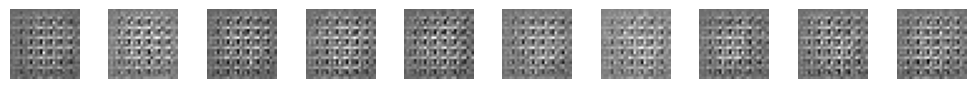

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
def train_gan(gan, generator, discriminator, epochs=10000, batch_size=128, save_interval=1000):
    # Carregar e pré-processar o dataset MNIST
    (x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    x_train = (x_train - 127.5) / 127.5  # Normalizar entre -1 e 1
    x_train = np.expand_dims(x_train, axis=-1)

    # Vetor de rótulos para o discriminador
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Treinar o discriminador
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_images = generator.predict(noise)                   # Esse código implementa o treinamento da rede usando conjunto de dados MNIST

        discriminator.trainable = True
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Treinar a GAN (o gerador via o discriminador)
        noise = np.random.normal(0, 1, (batch_size, 100))
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, real_labels)

        # Salvar e visualizar o progresso
        if epoch % save_interval == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
            save_images(epoch, generator)

def save_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5  # Voltar à escala [0,1]

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

# Treinar a GAN
train_gan(gan, generator, discriminator, epochs=10000, batch_size=128, save_interval=1000)
